# Initial Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Datasets/breach_report.csv')
df

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,CO,Healthcare Provider,26609,Hacking/IT Incident,Email,No
1,WI,Healthcare Provider,907,Unauthorized Access/Disclosure,Email,No
2,NH,Healthcare Provider,34878,Hacking/IT Incident,Network Server,No
3,CA,Healthcare Provider,500,Theft,Paper/Films,No
4,OH,Healthcare Provider,2716,Hacking/IT Incident,"Laptop, Network Server",No
...,...,...,...,...,...,...
717,FL,Healthcare Provider,35000,Unauthorized Access/Disclosure,Electronic Medical Record,No
718,OR,Healthcare Provider,2952,Hacking/IT Incident,Email,No
719,MN,Healthcare Provider,1200,Hacking/IT Incident,Email,No
720,GA,Healthcare Provider,278016,Hacking/IT Incident,Email,No


In [3]:
df.shape

(722, 6)

In [4]:
df.nunique()

State                                49
Covered Entity Type                   4
Individuals Affected                644
Type of Breach                        5
Location of Breached Information     34
Business Associate Present            2
dtype: int64

In [6]:
df.isnull().sum()

State                               2
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [8]:
# Dropping nan elements from state column
df.dropna(subset = ['State'], inplace = True)
df.isnull().sum()

State                               0
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [9]:
df.dtypes

State                               object
Covered Entity Type                 object
Individuals Affected                 int64
Type of Breach                      object
Location of Breached Information    object
Business Associate Present          object
dtype: object

# Univariate Analysis
- **Analyzing each individual feature separately looking for unique characteristics that can be investigated deeper during bivariate anlysis**

In [11]:
# Separating categorical and continous features
cat=[i for i in df.columns if df[i].nunique()<50]
cont=[i for i in df.columns if df[i].nunique()>50]

NY    65
TX    59
CA    55
FL    42
PA    35
OH    32
MI    24
MA    23
IL    23
GA    22
MN    22
MO    20
IN    18
NC    18
MD    18
CT    18
VA    17
NJ    16
CO    16
WI    14
AR    14
TN    13
IA    12
AZ    11
WA    10
KY    10
UT     9
LA     9
NM     8
DE     8
SC     7
NE     6
OR     6
ME     5
OK     4
NV     4
KS     3
ID     3
AK     3
WV     3
AL     3
NH     2
ND     2
WY     2
DC     2
VT     1
MS     1
HI     1
MT     1
Name: State, dtype: int64

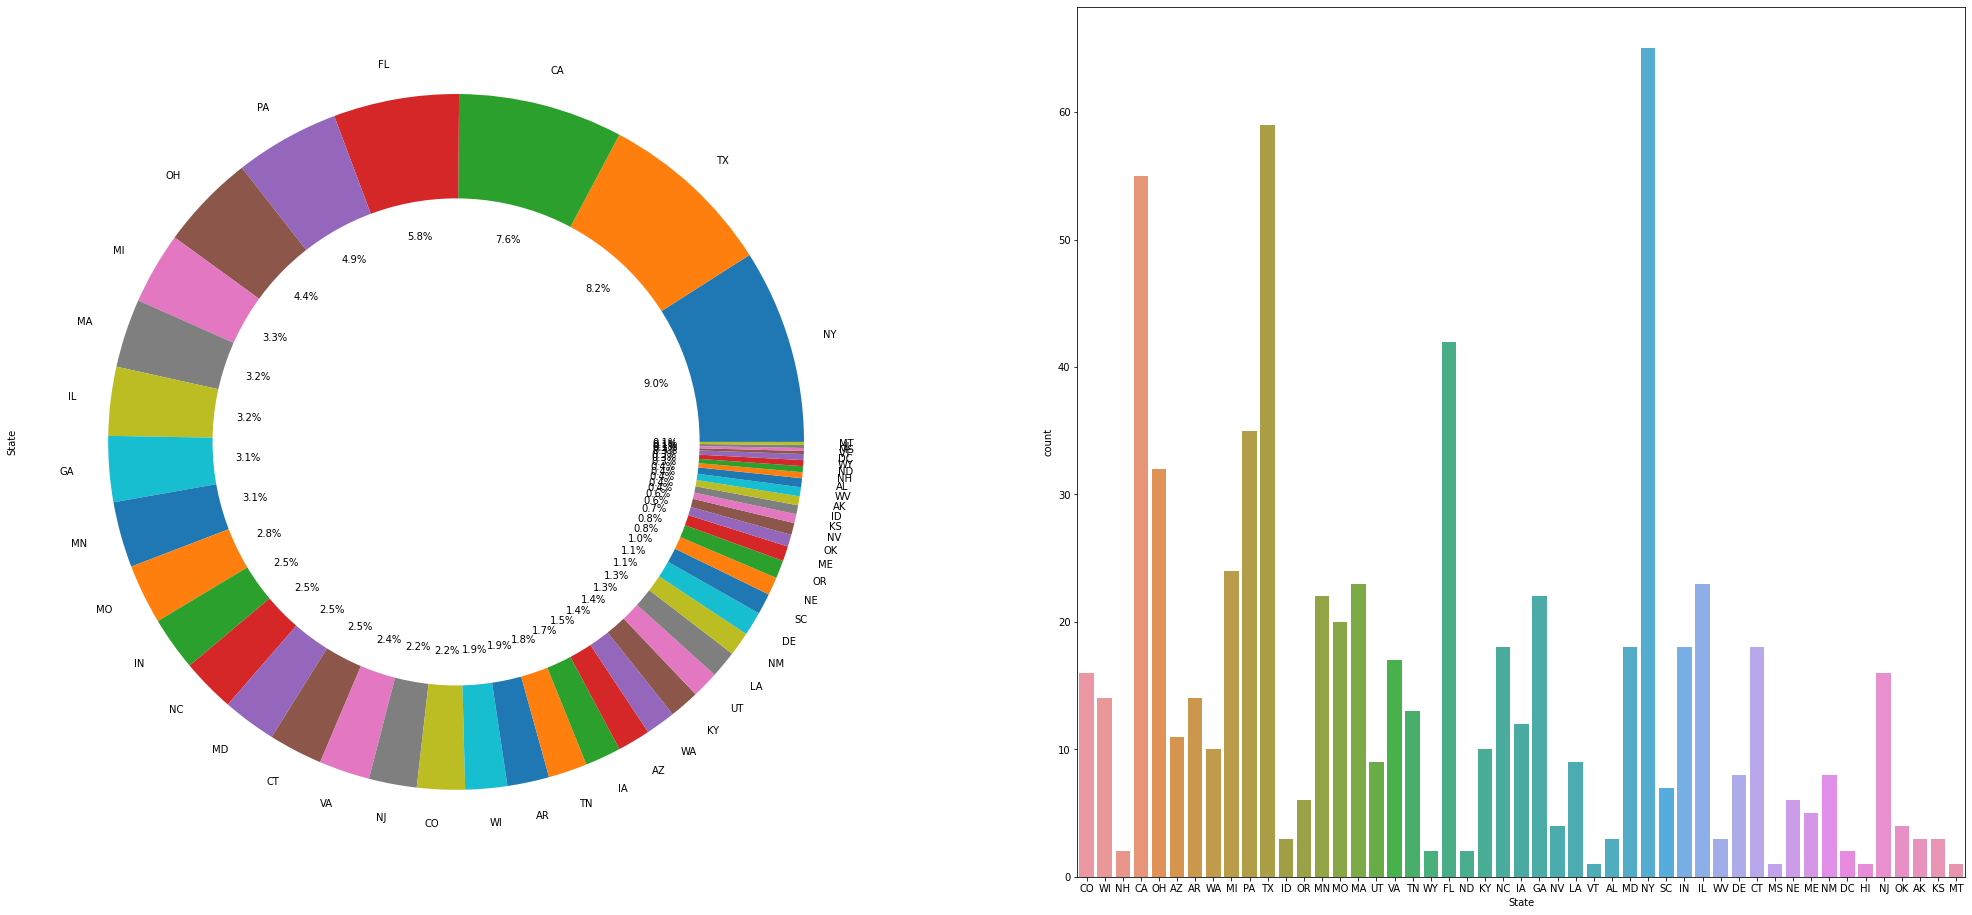

In [31]:
plt.figure(figsize=(35,16))
plt.subplot(1,2,1)
df['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State', data=df)
df['State'].value_counts()

Healthcare Provider          571
Business Associate            81
Health Plan                   67
Healthcare Clearing House      1
Name: Covered Entity Type, dtype: int64

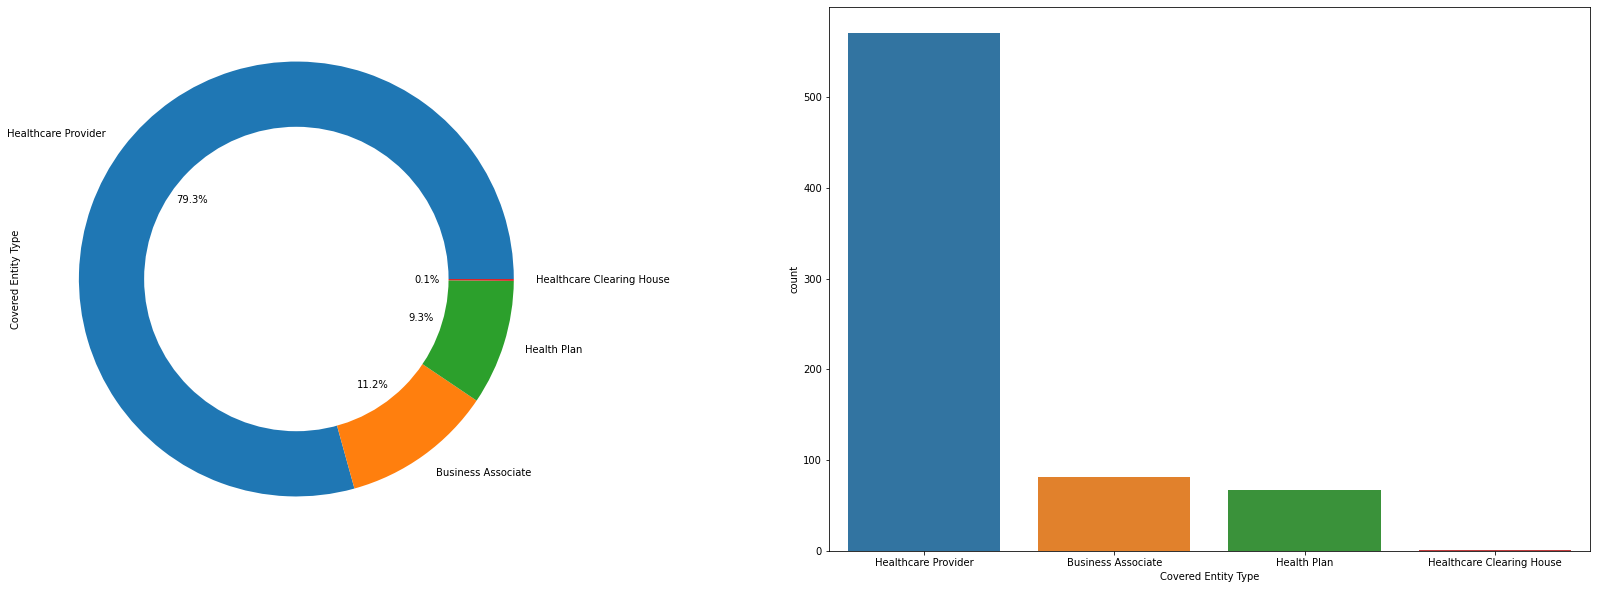

In [32]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Covered Entity Type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Covered Entity Type', data=df)
df['Covered Entity Type'].value_counts()

Hacking/IT Incident               521
Unauthorized Access/Disclosure    140
Theft                              33
Loss                               14
Improper Disposal                  12
Name: Type of Breach, dtype: int64

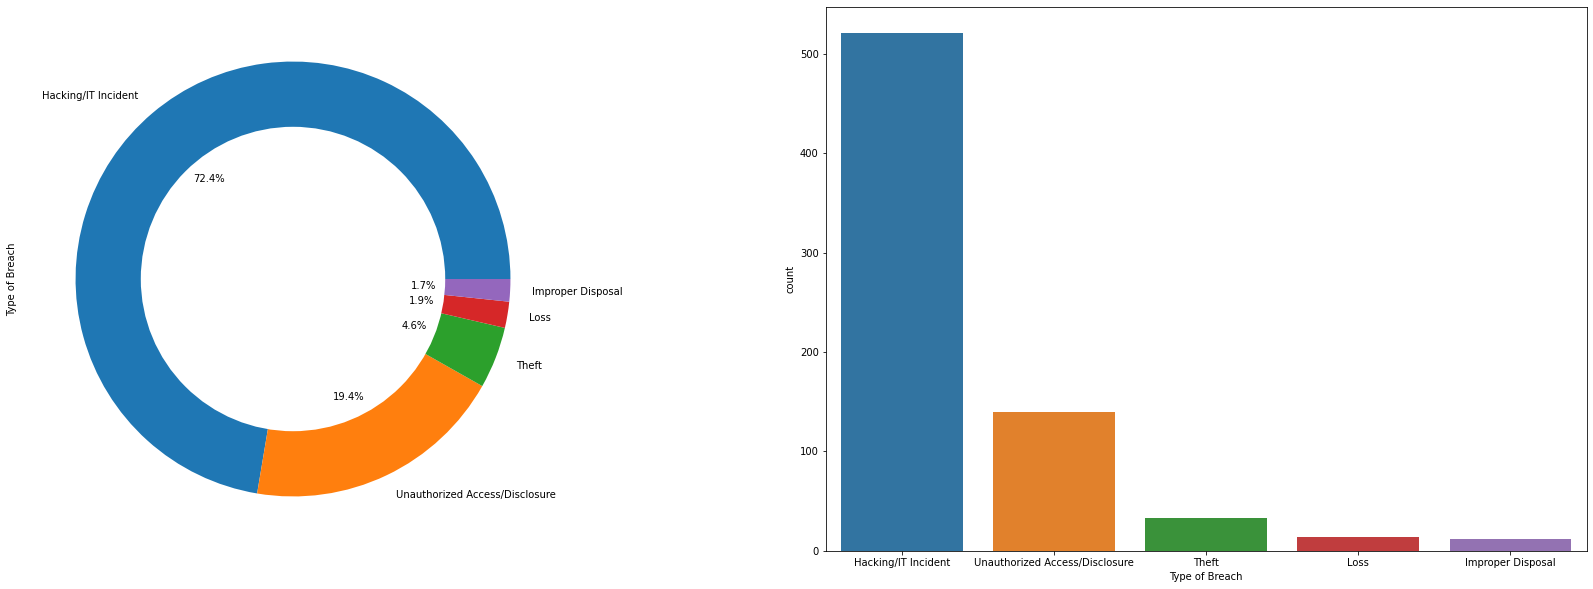

In [33]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Type of Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type of Breach', data=df)
df['Type of Breach'].value_counts()

Email                                                                         276
Network Server                                                                236
Paper/Films                                                                    57
Other                                                                          28
Electronic Medical Record                                                      28
Network Server, Other                                                          16
Laptop                                                                         11
Other Portable Electronic Device                                                9
Desktop Computer                                                                9
Email, Network Server                                                           8
Electronic Medical Record, Network Server                                       7
Desktop Computer, Network Server                                                6
Other Portable E

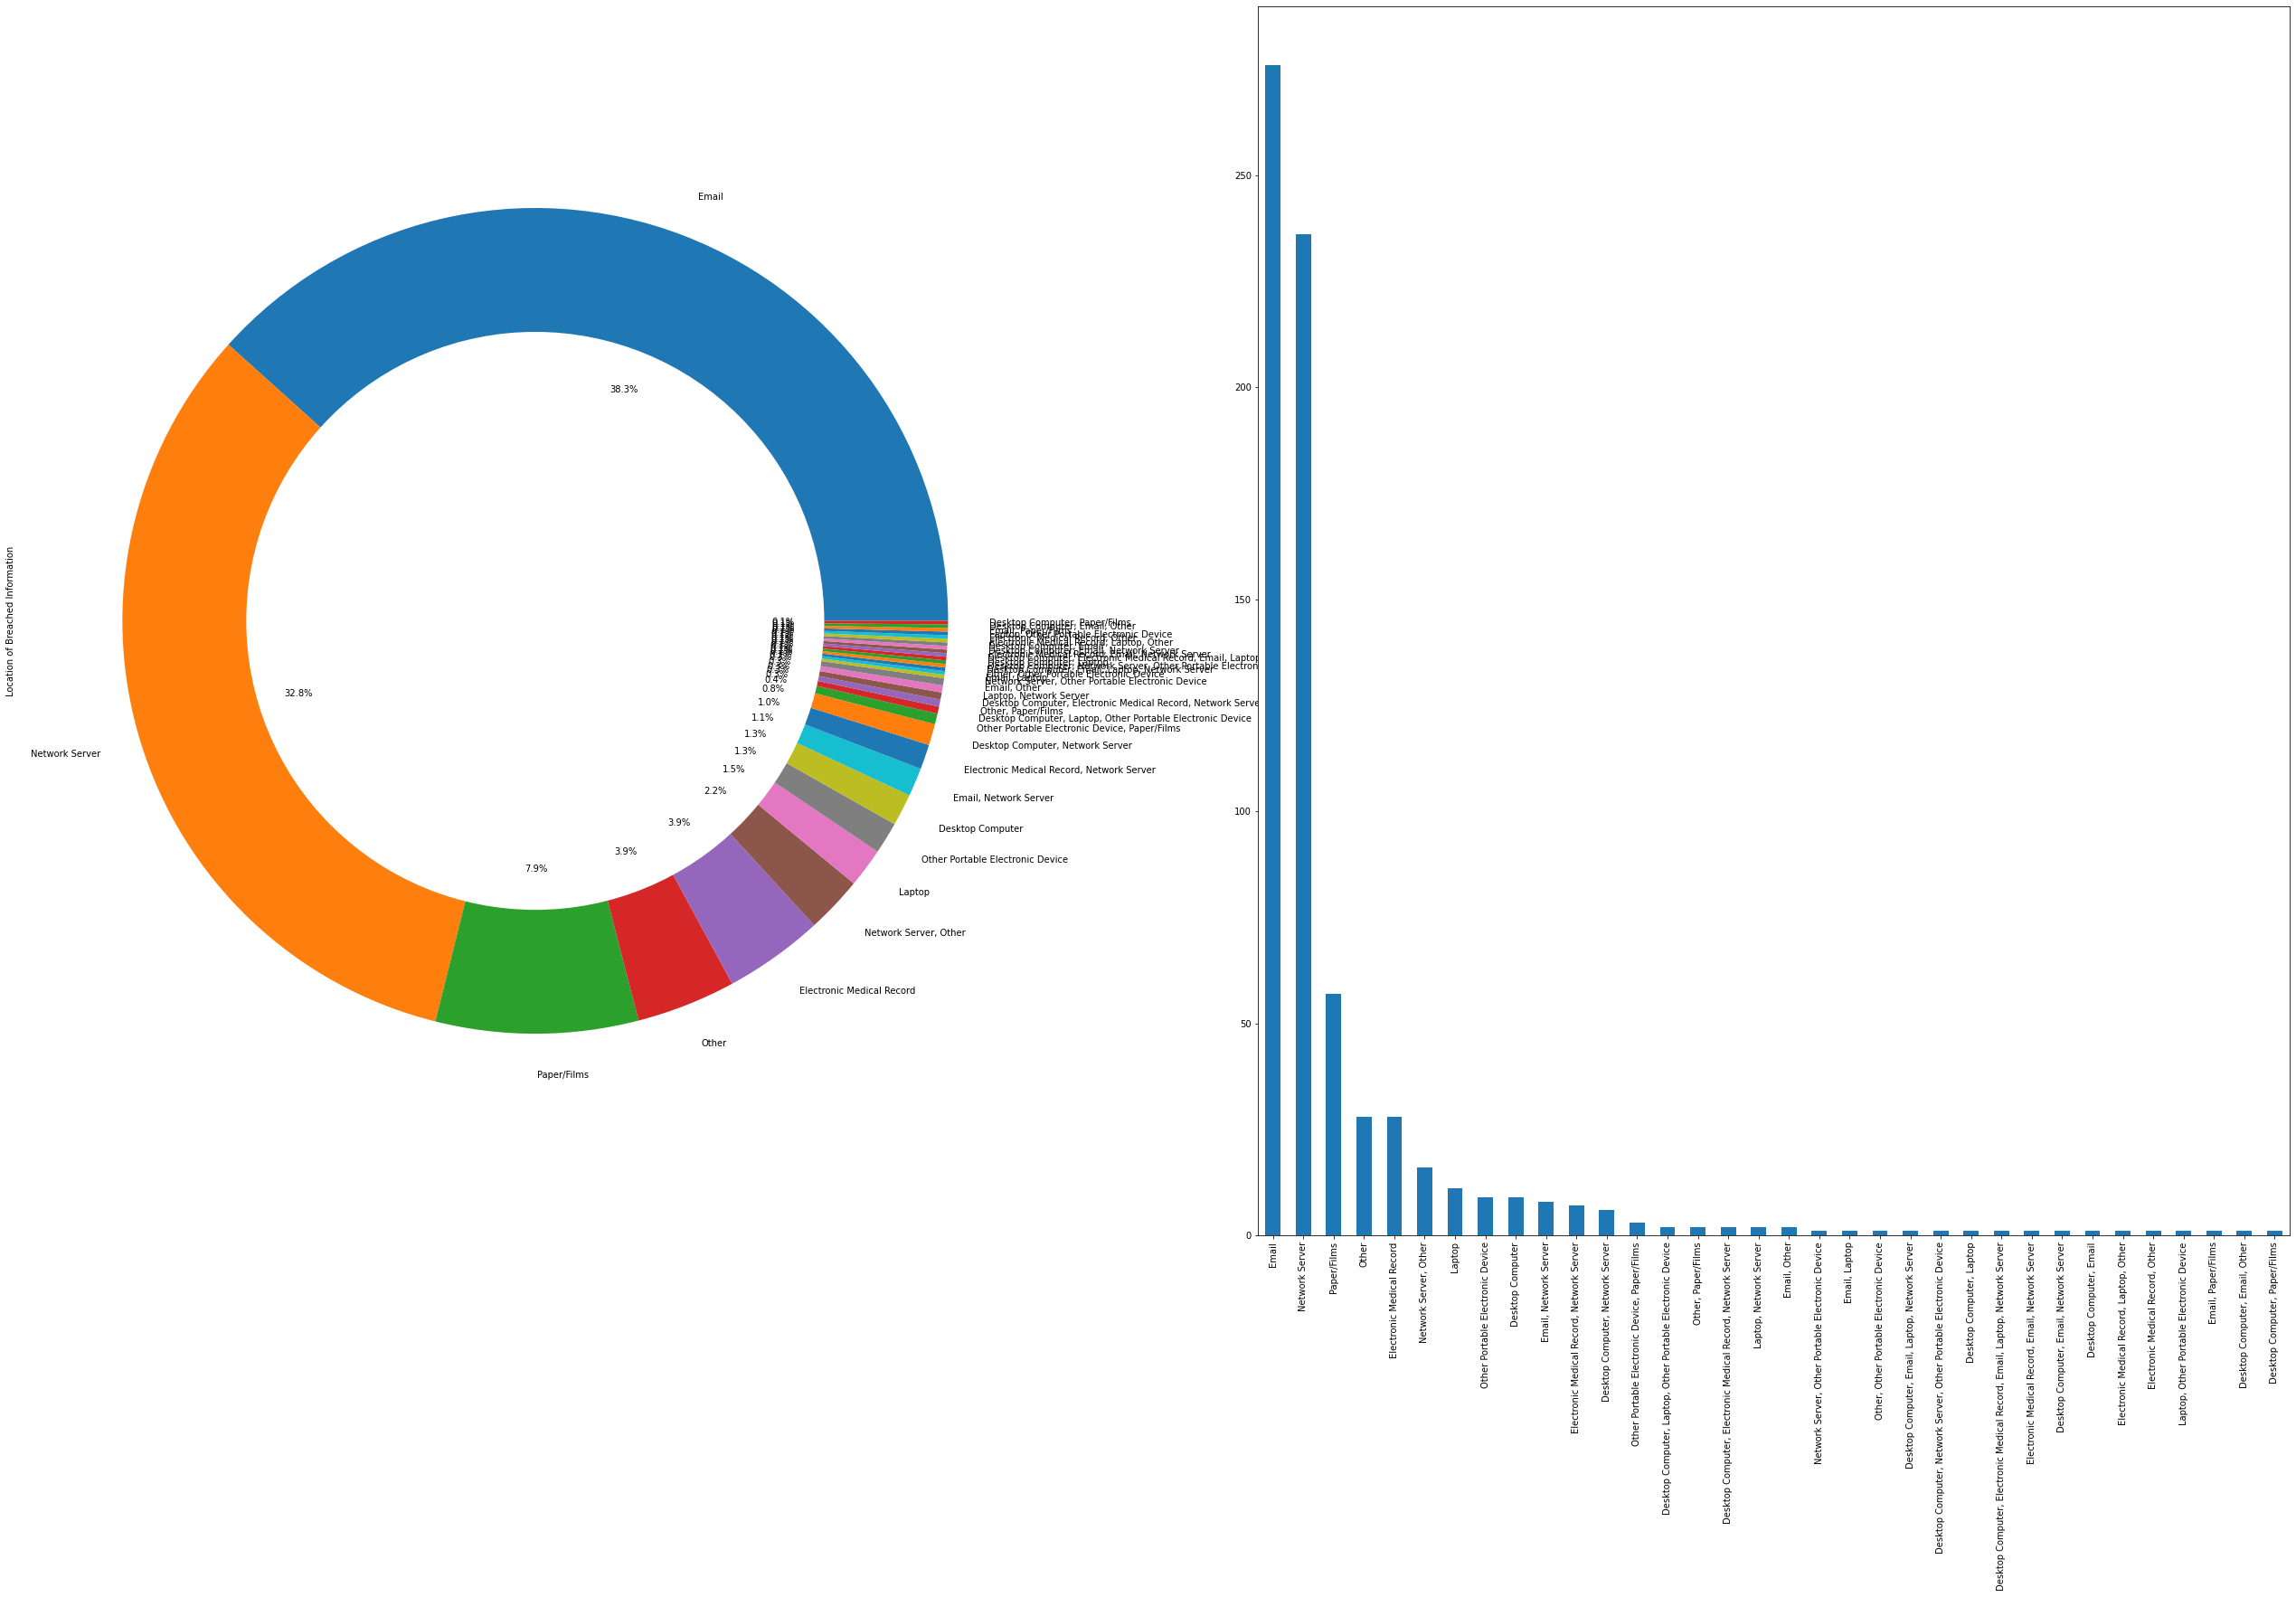

In [41]:
plt.figure(figsize=(45,25))
plt.subplot(1,2,1)
df['Location of Breached Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
df['Location of Breached Information'].value_counts().plot.bar()
df['Location of Breached Information'].value_counts()

No     496
Yes    224
Name: Business Associate Present, dtype: int64

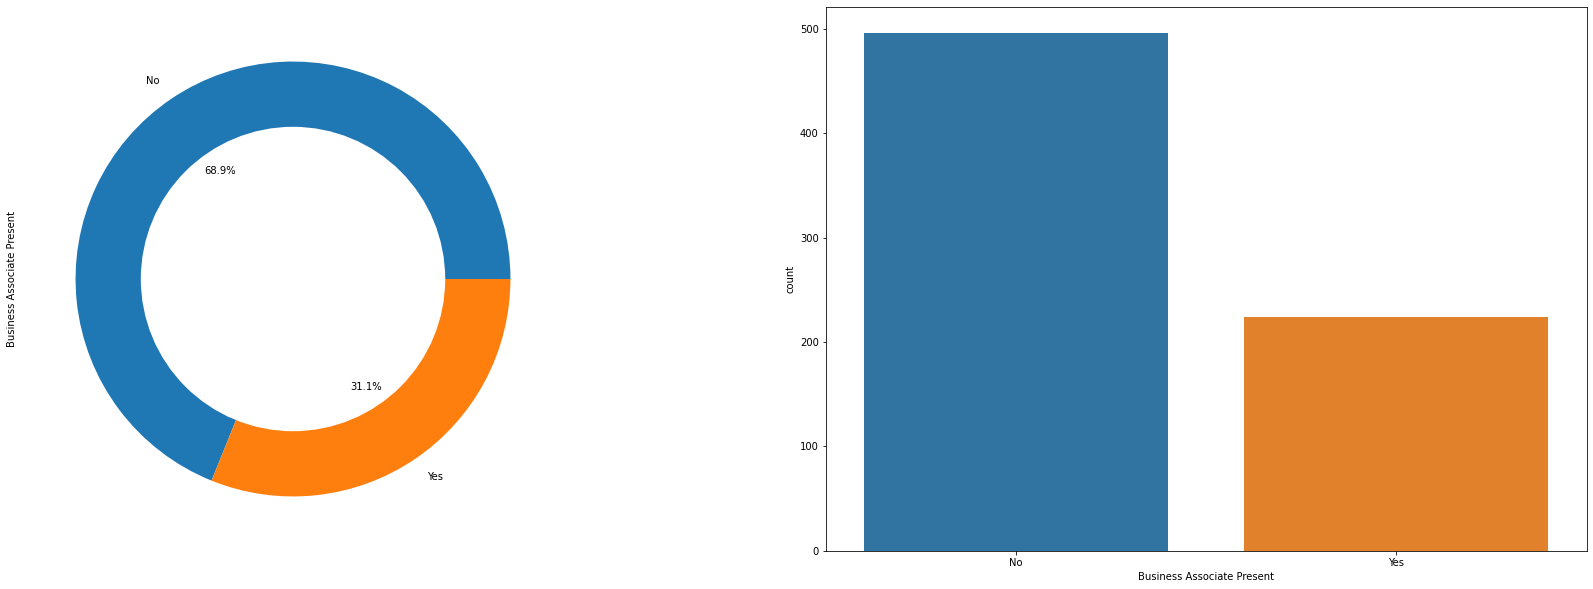

In [42]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Business Associate Present'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business Associate Present', data=df)
df['Business Associate Present'].value_counts()